<a href="https://colab.research.google.com/github/yashasangani/Machine-Learning/blob/main/FeatureScaling_Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day24-standardization/Social_Network_Ads.csv")

In [98]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [99]:
df = df.iloc[:,2:]

In [100]:
df.sample(5)

,Age,EstimatedSalary,Purchased
55,24,55000,0
160,32,100000,1
206,55,130000,1
248,41,52000,0
73,33,113000,0


# Train Test split

In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('Purchased',axis = 1), df['Purchased'],test_size = 0.3,random_state = 0)

In [102]:
x_train.shape,x_test.shape

((280, 2), (120, 2))

# Standard Scaler

In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fit the scaler to the train set, it will learn the parameter
scaler.fit(x_train)

#transform train and test sets

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [104]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [105]:
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [106]:
x_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [107]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns = x_test.columns)

In [108]:
round(x_train_scaled.describe(),2)

,Age,EstimatedSalary
count,280.00,280.00
mean,0.00,0.00
std,1.00,1.00
min,-1.95,-1.58
25%,-0.77,-0.78
50%,-0.08,0.02
75%,0.80,0.53
max,2.17,2.32


# Effact of Scaling

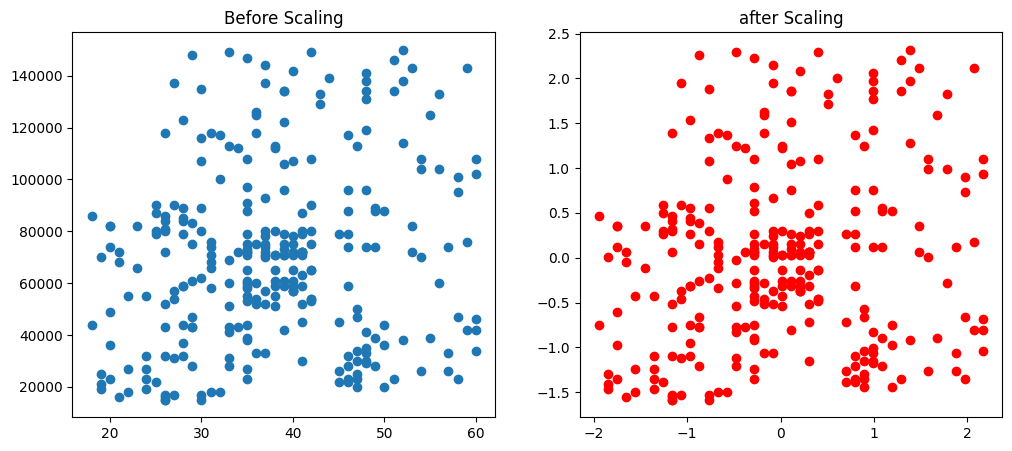

In [109]:
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))
ax1.scatter (x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color = 'red')
ax2.set_title("after Scaling")
plt.show()




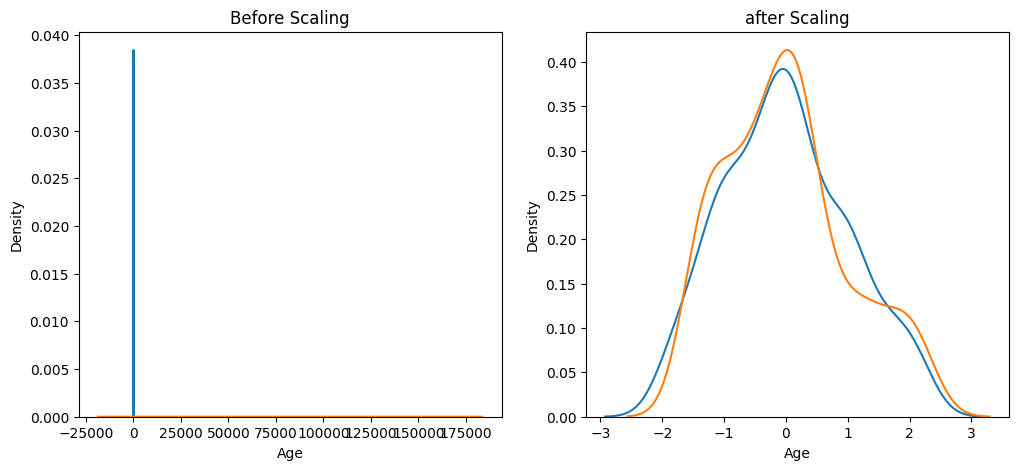

In [110]:
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))

#before scaling
sns.kdeplot(x_train['Age'],ax = ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax = ax1)
ax1.set_title("Before Scaling")

#after scaling

ax2.set_title("after Scaling")
sns.kdeplot(x_train_scaled['Age'],ax = ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax = ax2)
plt.show()


### Comparison of Distributions

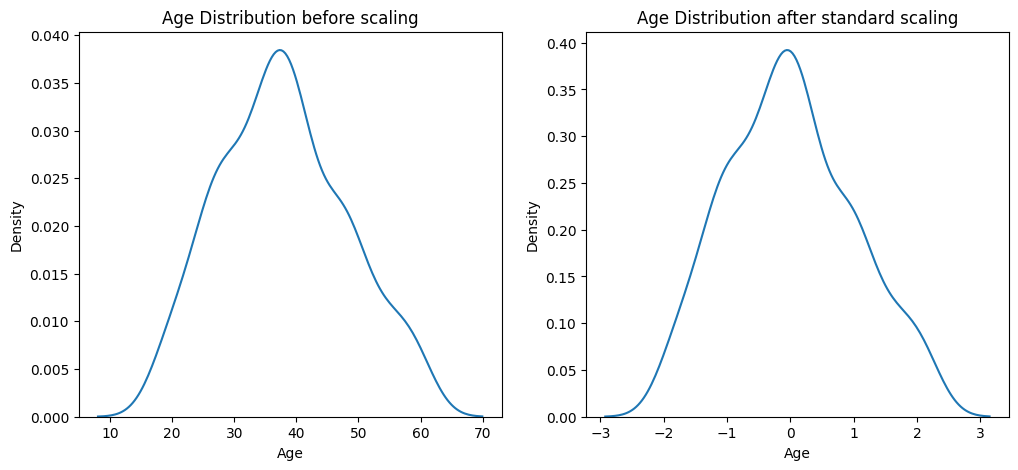

In [111]:
fig,(ax1,ax2) = plt.subplots(ncols= 2,figsize = (12,5))

#before scaling
ax1.set_title("Age Distribution before scaling")
sns.kdeplot(x_train['Age'],ax = ax1)

# after standard scaling
ax2.set_title("Age Distribution after standard scaling")
sns.kdeplot(x_train_scaled['Age'],ax = ax2)
plt.show()

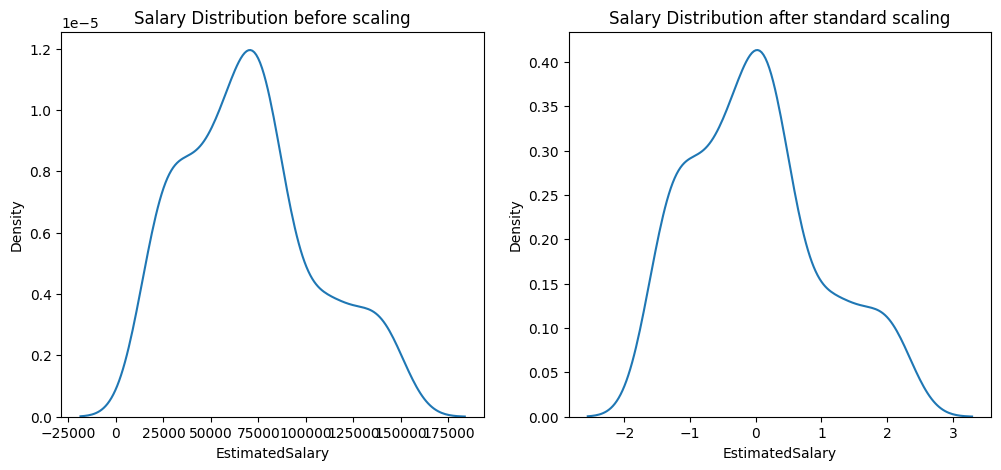

In [112]:
fig,(ax1,ax2) = plt.subplots(ncols= 2,figsize = (12,5))

#before scaling
ax1.set_title("Salary Distribution before scaling")
sns.kdeplot(x_train['EstimatedSalary'],ax = ax1)

# after standard scaling
ax2.set_title("Salary Distribution after standard scaling")
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax = ax2)
plt.show()

### Why Scaling is important?

In [113]:
from sklearn.linear_model import LogisticRegression


In [114]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [115]:
lr.fit(x_train,y_train)
lr.fit(x_train_scaled,y_train)

LogisticRegression()

In [116]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr.predict(x_test_scaled)

In [117]:
from sklearn.metrics import accuracy_score
print("Actual", accuracy_score(y_test,y_pred))
print("Scaled" , accuracy_score(y_test,y_pred_scaled))

Actual 0.3416666666666667
Scaled 0.8666666666666667


In [118]:
from sklearn.tree import DecisionTreeClassifier


In [119]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [120]:
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [121]:
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [122]:
from sklearn.metrics import accuracy_score

In [123]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


In [124]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000
